# Анализ количественных данных

    Район             Конкурс   Год  Количество участников  Средний балл  \
0  Район1  Английский язык_ШЭ  2023                    244         44.30   
1  Район1  Английский язык_МЭ  2023                    106         28.71   
2  Район1  Английский язык_РЭ  2023                     68         19.53   
3  Район1  Английский язык_ЗЭ  2023                    227         46.88   
4  Район1  Английский язык_МЭ  2024                    126         26.18   

                                  Необходимые знания  
0  Знание основ английского языка, включая грамма...  
1  Разговорный английский на среднем уровне, навы...  
2  Чтение и глубокое понимание сложных текстов, н...  
3  Письмо и составление различных текстов, включа...  
4  Разговорный английский на высоком уровне, анал...  
               Год  Количество участников  Средний балл
count  4299.000000            4299.000000   4299.000000
mean   2023.500349             124.665736     28.751400
std       0.500058              71.931823    

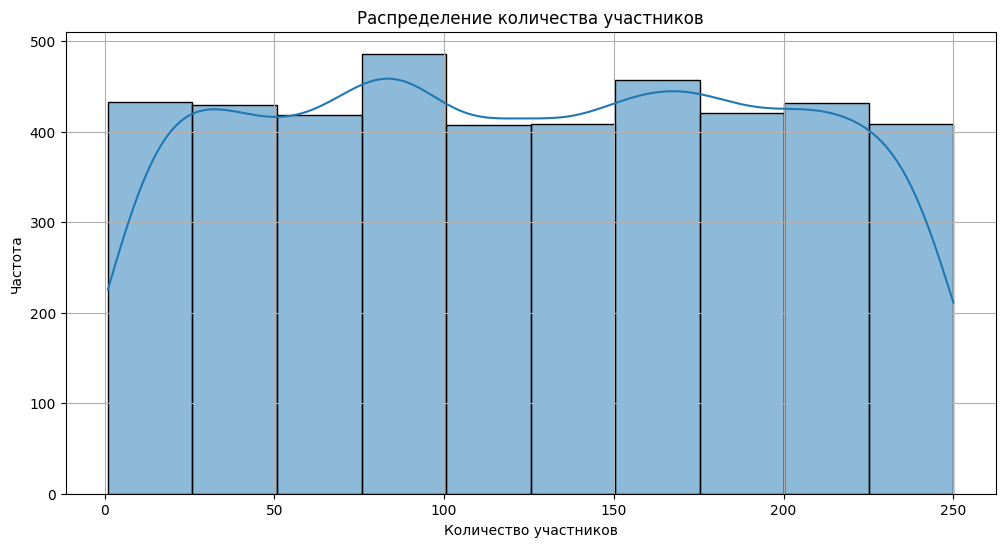

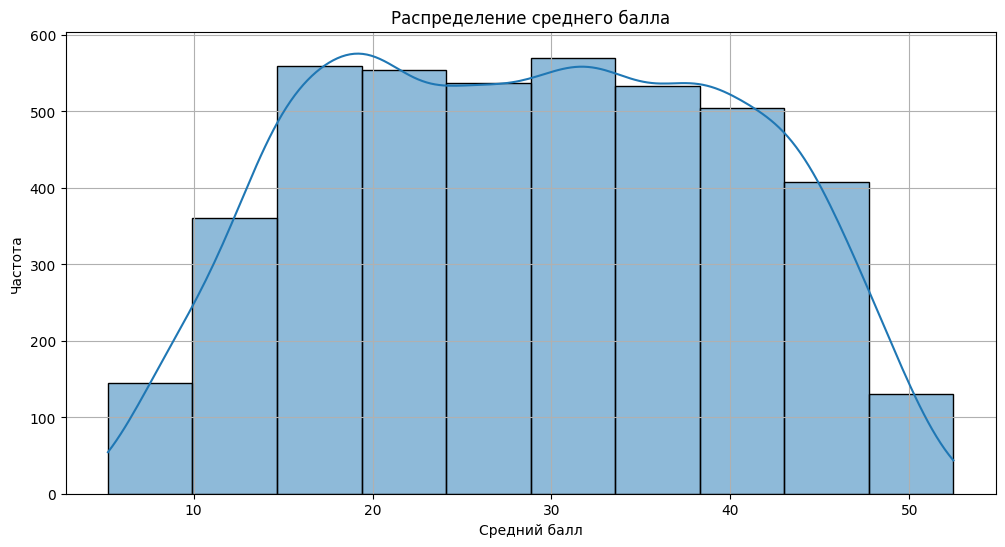

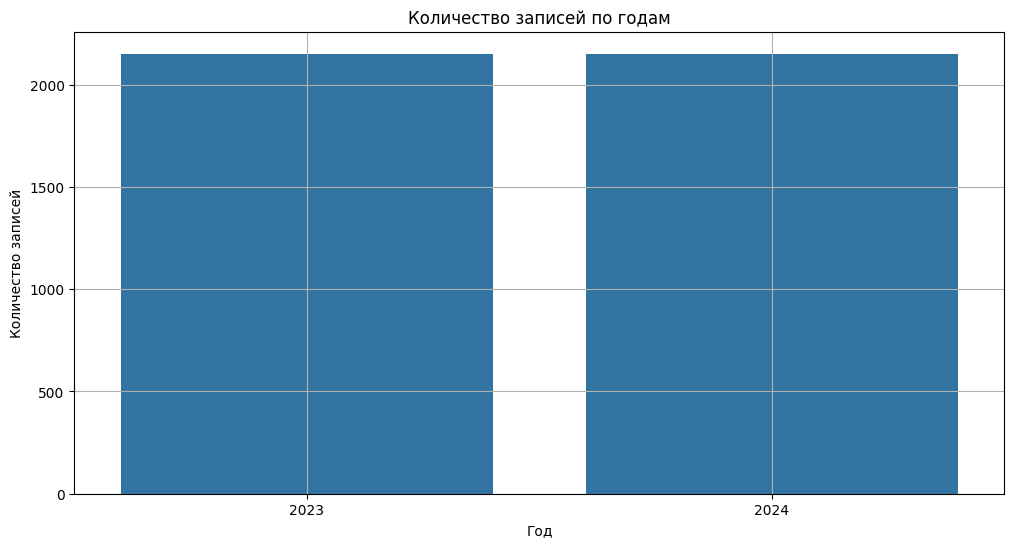

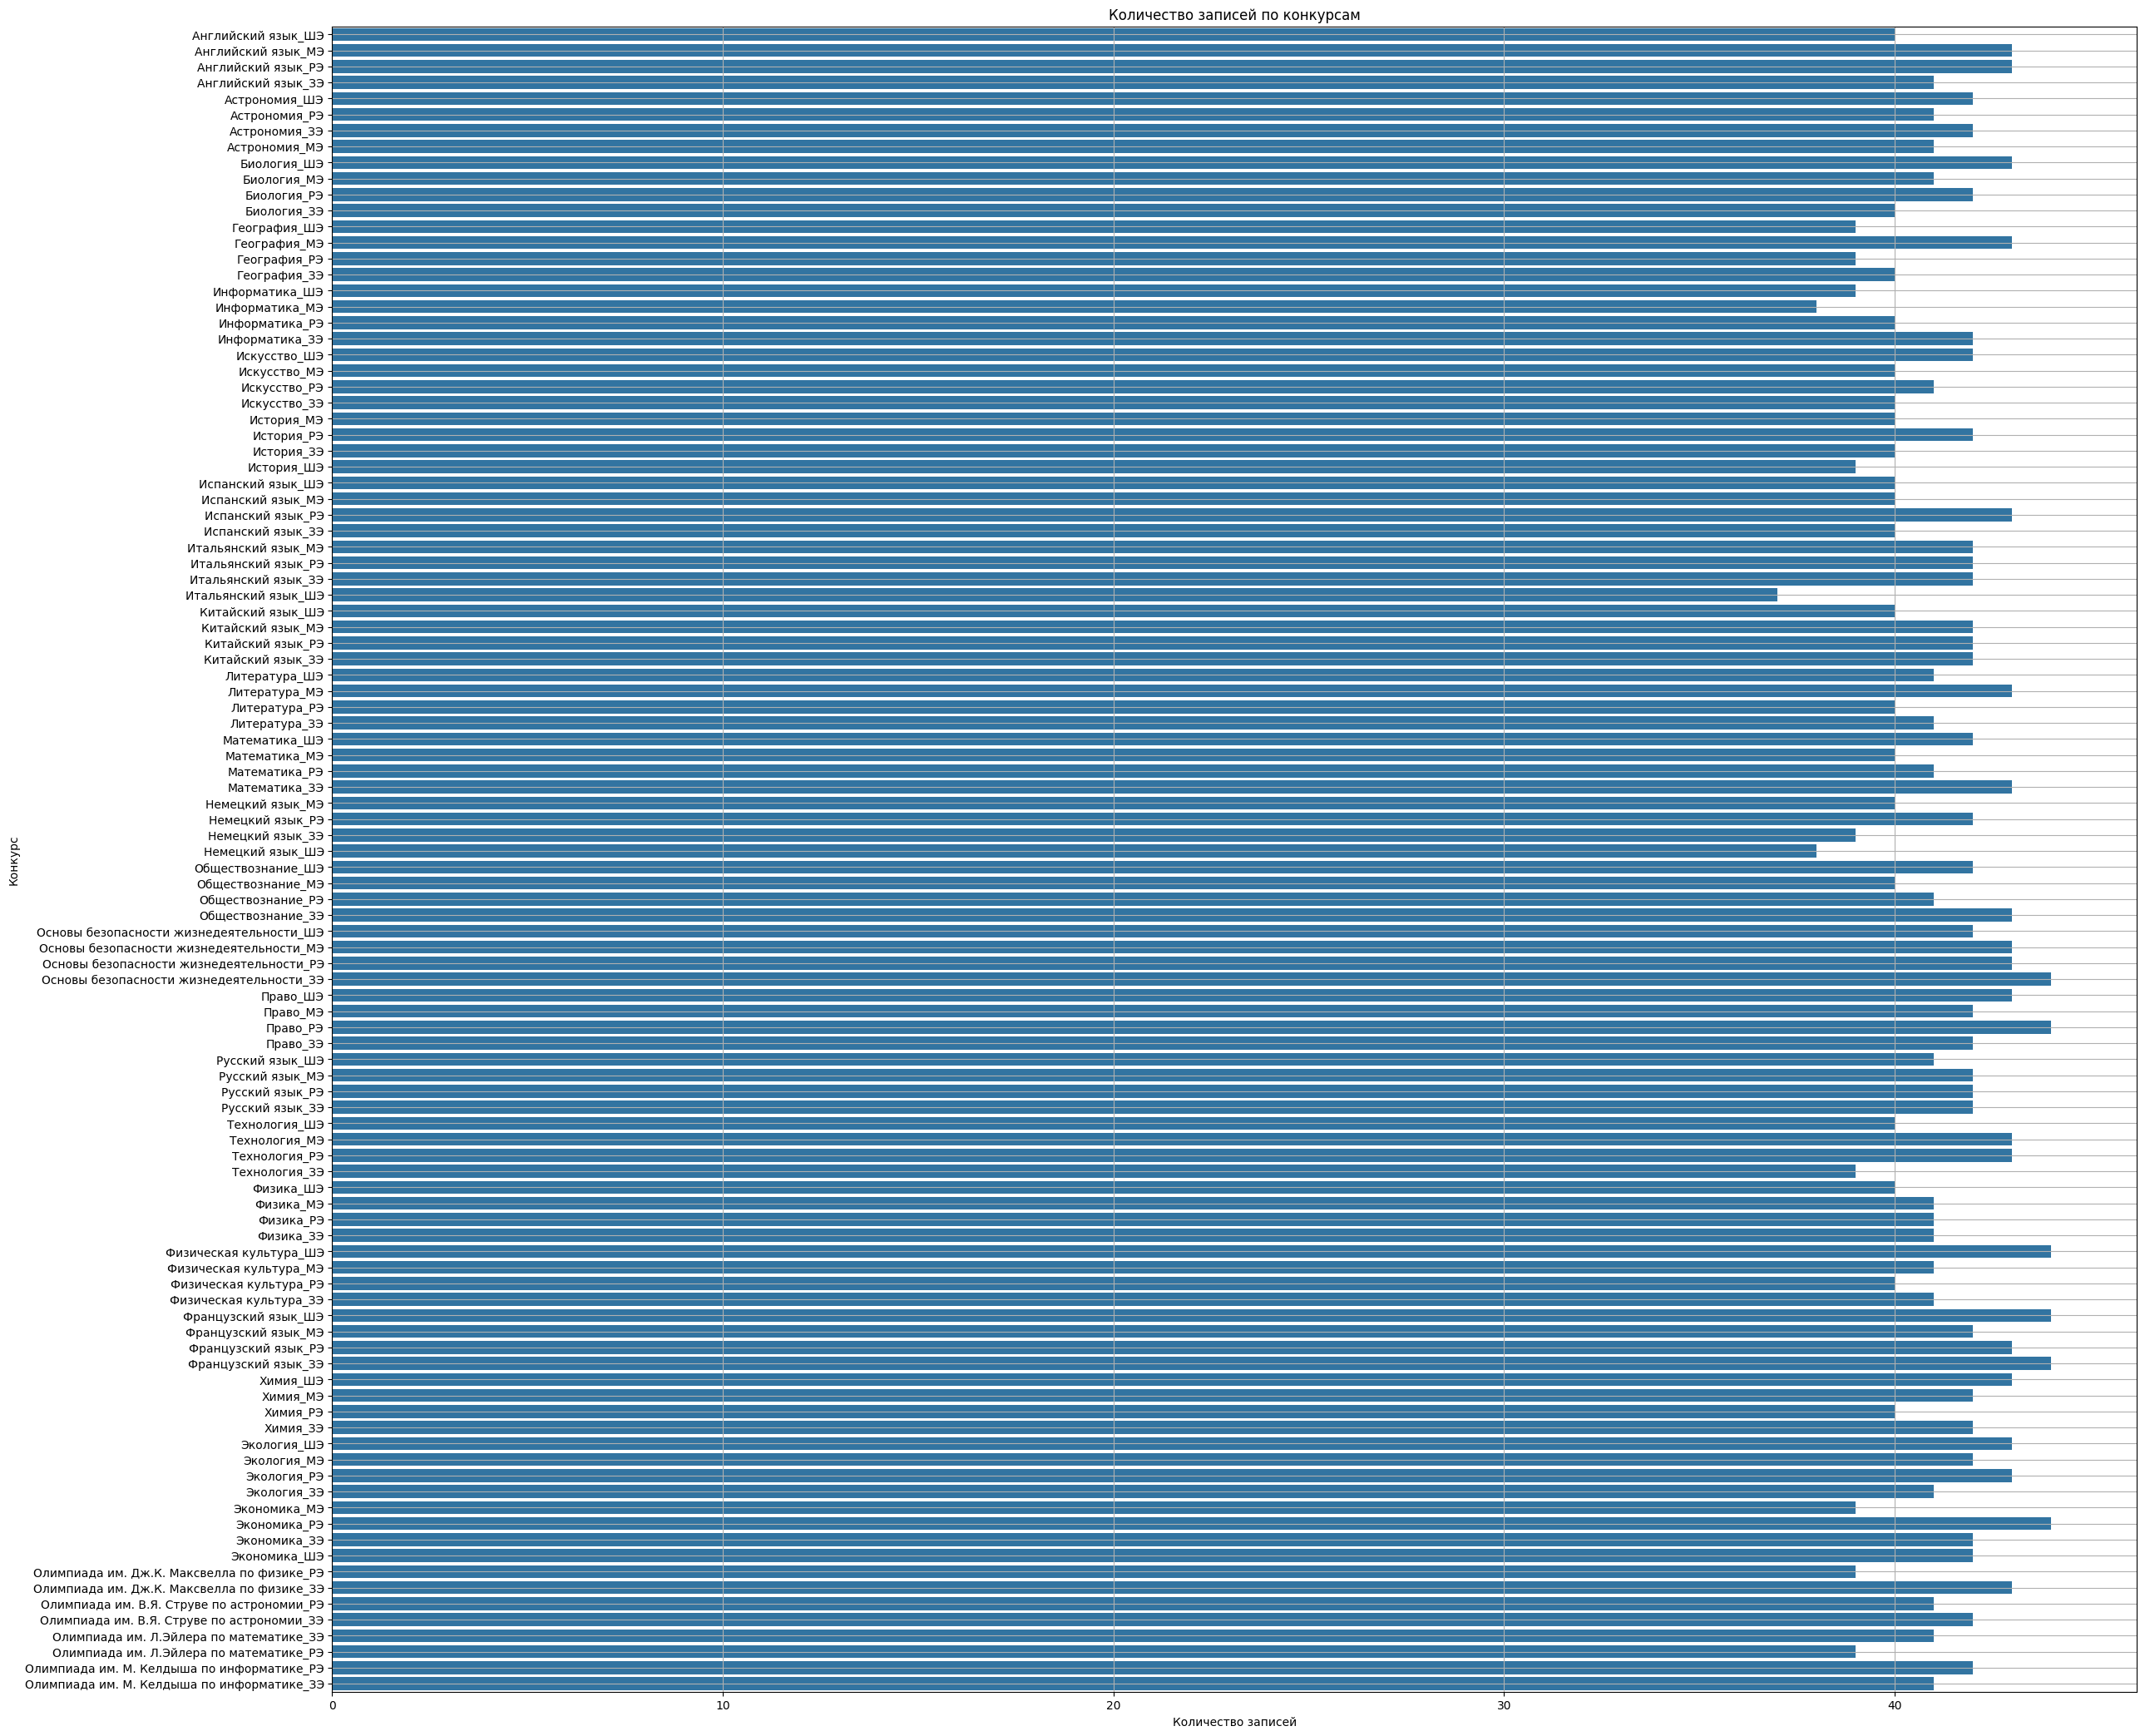

Статистика по районам:
       Район Количество участников                            Средний балл  \
                             mean median        std min  max         mean   
0    Район1            122.446154  121.0  73.268964   1  249    28.368564   
1   Район10            129.208955  134.0  67.801889   1  250    29.076716   
2   Район11            118.777202  107.0  73.379558   2  249    28.218290   
3   Район12            130.338462  130.0  72.777859   1  249    29.630000   
4   Район13            129.863636  129.0  73.417909   3  250    29.341515   
5   Район14            133.087179  135.0  68.430773   3  249    30.255692   
6   Район15            130.121827  125.0  75.809747   1  248    29.617462   
7   Район16            127.989637  128.0  75.917992   4  250    29.078497   
8   Район17            119.281250  118.0  69.030944   2  247    28.086719   
9   Район18            123.083333  123.5  73.749280   1  250    28.565677   
10  Район19            126.900000  123.0  68.333942 

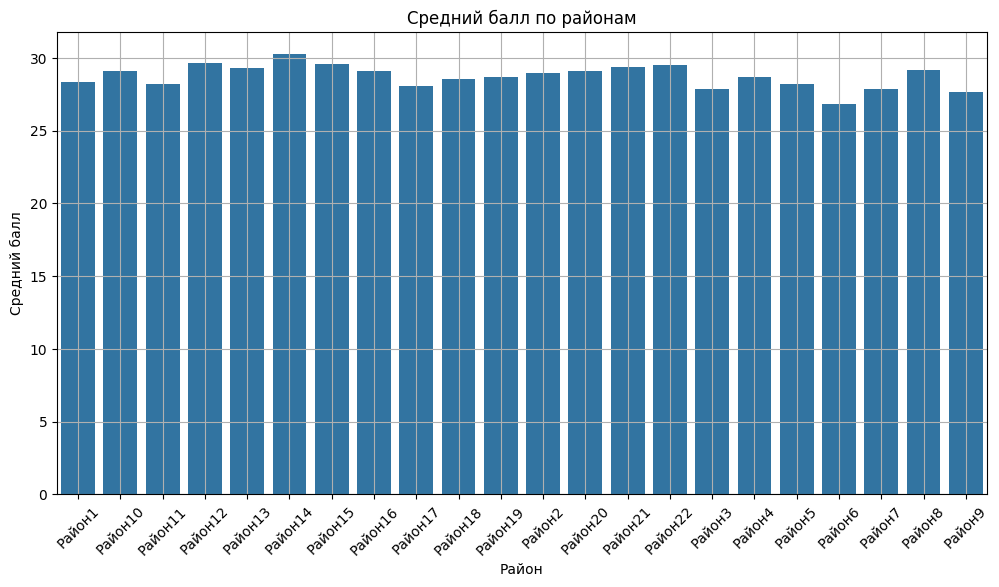

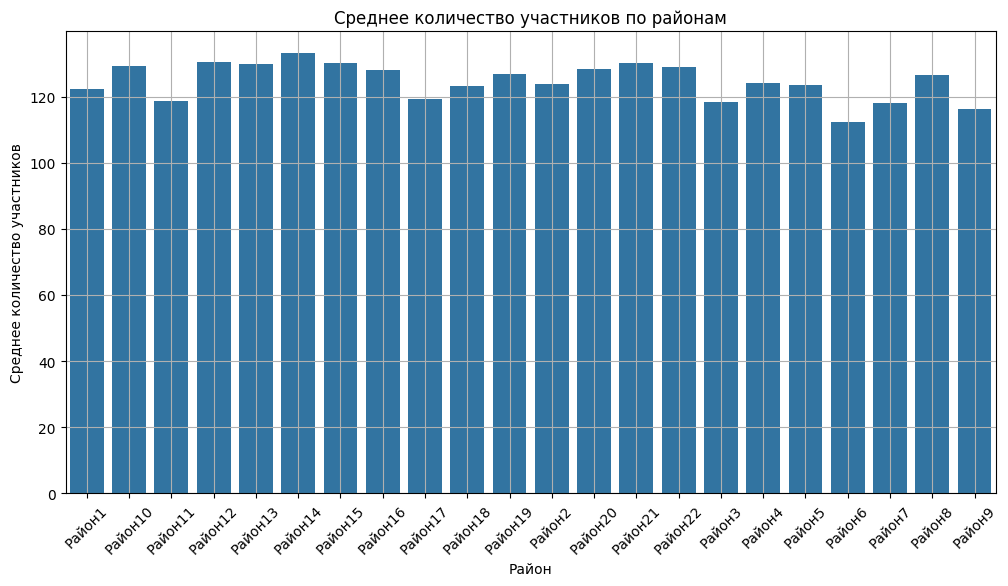

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV-файла
data = pd.read_csv('C:/Users/yegor/Desktop/BI/ModuleA/cleaned_data1.csv')

# Просмотр первых строк данных
print(data.head())

# Анализ основных свойств данных
# 1. Основные статистические параметры
stats = data.describe()
print(stats)

# 2. Расчет дополнительных статистических параметров только для числовых столбцов
numeric_data = data.select_dtypes(include=['number'])  # Отбираем только числовые столбцы

median = numeric_data.median()
mode = numeric_data.mode().iloc[0]  # берем первую моду
std_dev = numeric_data.std()
"""
Медиана, мода и стандартное отклонение - это основные статистические параметры, которые помогают описать распределение данных.

1. **Медиана** - это значение, которое делит набор данных на две равные части. Если данные отсортированы, медиана - это среднее значение двух центральных чисел (если количество наблюдений четное) или центральное число (если количество наблюдений нечетное). Медиана является устойчивой к выбросам, что делает её полезной для анализа распределений с аномальными значениями.

2. **Мода** - это значение, которое встречается в наборе данных наиболее часто. Набор данных может иметь одну моду (унарная мода), несколько мод (мультимодальный) или не иметь моды вовсе (если все значения уникальны). Мода полезна для определения наиболее распространенного значения в наборе данных.

3. **Стандартное отклонение** - это мера разброса или вариации значений в наборе данных. Оно показывает, насколько значения отклоняются от среднего значения. Низкое стандартное отклонение указывает на то, что значения близки к среднему, в то время как высокое стандартное отклонение указывает на то, что значения распределены более широко. Стандартное отклонение рассчитывается как квадратный корень из дисперсии.

Эти параметры помогают лучше понять характеристики данных и их распределение.
"""
print("Медиана:\n", median)
print("Мода:\n", mode)
print("Стандартное отклонение:\n", std_dev)

# 3. Построение графиков распределения для всех атрибутов
# График для 'Количество участников'
plt.figure(figsize=(12, 6))
sns.histplot(data['Количество участников'], bins=10, kde=True)
plt.title('Распределение количества участников')
plt.xlabel('Количество участников')
plt.ylabel('Частота')
plt.grid()
plt.show()

# График для 'Средний балл'
plt.figure(figsize=(12, 6))
sns.histplot(data['Средний балл'], bins=10, kde=True)
plt.title('Распределение среднего балла')
plt.xlabel('Средний балл')
plt.ylabel('Частота')
plt.grid()
plt.show()

# График для 'Год'
plt.figure(figsize=(12, 6))
sns.countplot(x='Год', data=data)
plt.title('Количество записей по годам')
plt.xlabel('Год')
plt.ylabel('Количество записей')
plt.grid()
plt.show()

# График для 'Конкурс'
plt.figure(figsize=(28, 26))
sns.countplot(y='Конкурс', data=data)
plt.title('Количество записей по конкурсам')
plt.xlabel('Количество записей')
plt.ylabel('Конкурс')
plt.grid()
plt.show()

# Анализ по району  СДЕЛАТЬ ДЛЯ ВСЕХ ПОЛЕЙ !!!!!!!!!!!!!!!!!!!!!!!!!!!
# Группировка данных по району и расчет статистических параметров
district_stats = data.groupby('Район').agg({
    'Количество участников': ['mean', 'median', 'std', 'min', 'max'],
    'Средний балл': ['mean', 'median', 'std', 'min', 'max']
}).reset_index()

print("Статистика по районам:\n", district_stats)

# Построение графиков для анализа по району
# График для среднего балла по районам
plt.figure(figsize=(12, 6))
sns.barplot(x='Район', y=('Средний балл', 'mean'), data=district_stats)
plt.title('Средний балл по районам')
plt.xlabel('Район')
plt.ylabel('Средний балл')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# График для количества участников по районам
plt.figure(figsize=(12, 6))
sns.barplot(x='Район', y=('Количество участников', 'mean'), data=district_stats)
plt.title('Среднее количество участников по районам')
plt.xlabel('Район')
plt.ylabel('Среднее количество участников')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Описание кода:
Корреляционный анализ:

Мы вычисляем корреляцию между "Количество участников" и "Средний балл" с помощью метода corr().
Затем визуализируем корреляцию с помощью тепловой карты.
Группировка данных по годам:

Мы группируем данные по "Год" и рассчитываем средние, медианные и стандартные отклонения для "Количество участников" и "Средний балл".
Строим линейный график, чтобы увидеть, как меняются средний балл и количество участников с течением времени.
Группировка данных по районам:

Мы группируем данные по "Район" и рассчитываем статистику для "Количество участников" и "Средний балл".
Строим столбчатые графики для визуализации среднего балла и среднего количества участников по районам.
Заключение:
После выполнения этого анализа вы сможете выявить закономерности в ваших данных, такие как:

Существует ли связь между количеством участников и средним баллом.
Как изменяются средние значения по годам.
Как различаются результаты по районам.
Эти выводы могут помочь вам лучше понять данные и принять обоснованные решения на их основе.

    Район             Конкурс   Год  Количество участников  Средний балл  \
0  Район1  Английский язык_ШЭ  2023                    244         44.30   
1  Район1  Английский язык_МЭ  2023                    106         28.71   
2  Район1  Английский язык_РЭ  2023                     68         19.53   
3  Район1  Английский язык_ЗЭ  2023                    227         46.88   
4  Район1  Английский язык_МЭ  2024                    126         26.18   

                                  Необходимые знания  
0  Знание основ английского языка, включая грамма...  
1  Разговорный английский на среднем уровне, навы...  
2  Чтение и глубокое понимание сложных текстов, н...  
3  Письмо и составление различных текстов, включа...  
4  Разговорный английский на высоком уровне, анал...  
Корреляция между количеством участников и средним баллом:
                        Количество участников  Средний балл
Количество участников               1.000000      0.966175
Средний балл                        

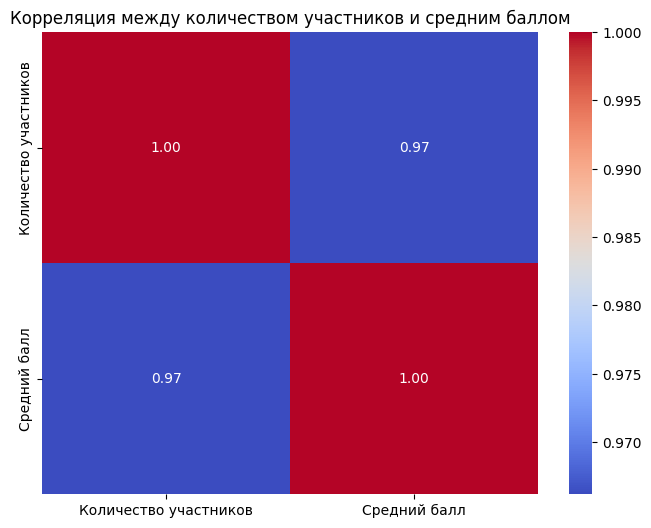

Статистика по годам:
     Год Количество участников                   Средний балл          \
                         mean median        std         mean  median   
0  2023            125.607542  125.5  72.336539    28.867286  28.885   
1  2024            123.725244  122.0  71.529830    28.635676  28.740   

              
         std  
0  11.136981  
1  11.166541  


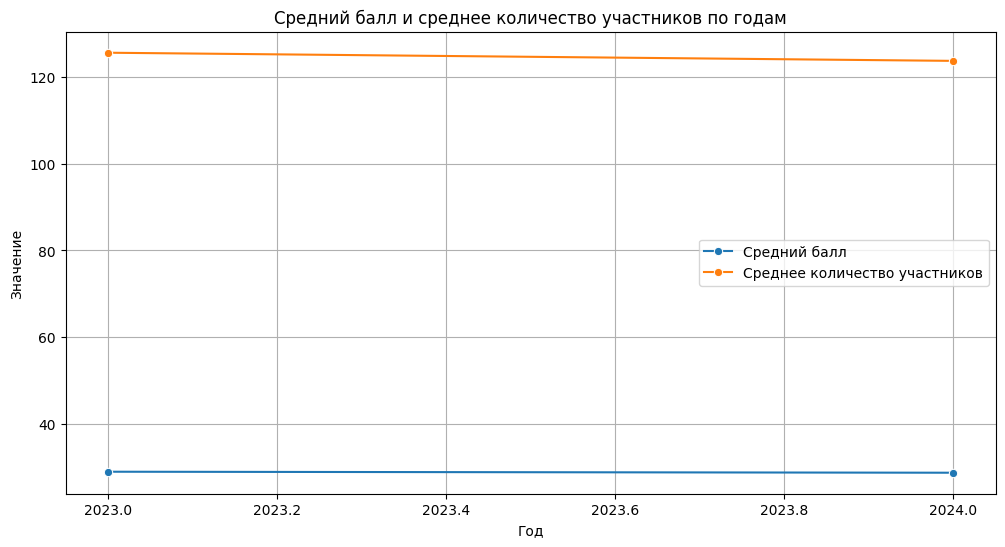

Статистика по районам:
       Район Количество участников                   Средний балл          \
                             mean median        std         mean  median   
0    Район1            122.446154  121.0  73.268964    28.368564  28.710   
1   Район10            129.208955  134.0  67.801889    29.076716  30.220   
2   Район11            118.777202  107.0  73.379558    28.218290  27.960   
3   Район12            130.338462  130.0  72.777859    29.630000  30.330   
4   Район13            129.863636  129.0  73.417909    29.341515  28.845   
5   Район14            133.087179  135.0  68.430773    30.255692  31.400   
6   Район15            130.121827  125.0  75.809747    29.617462  29.930   
7   Район16            127.989637  128.0  75.917992    29.078497  29.690   
8   Район17            119.281250  118.0  69.030944    28.086719  27.890   
9   Район18            123.083333  123.5  73.749280    28.565677  29.190   
10  Район19            126.900000  123.0  68.333942    28.718600

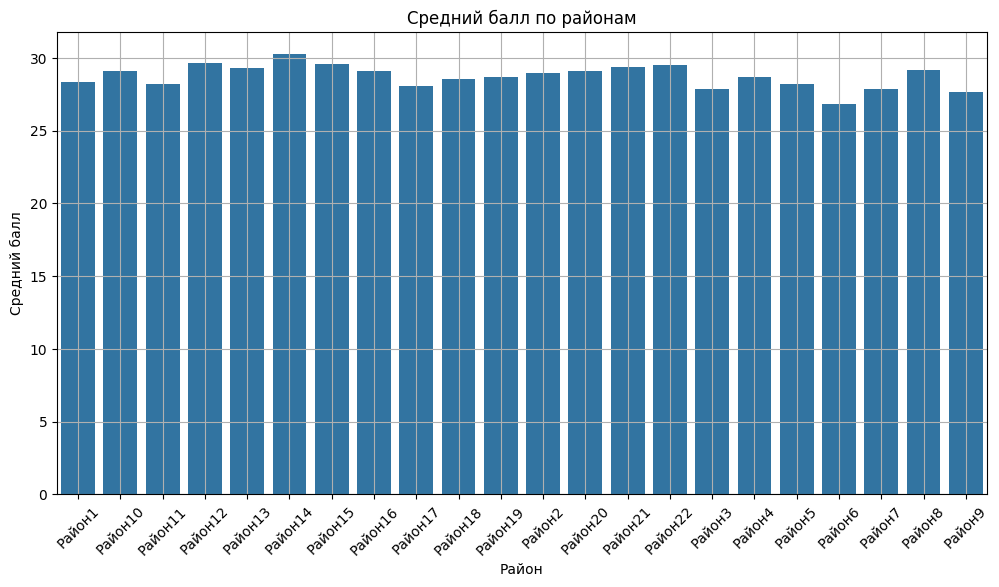

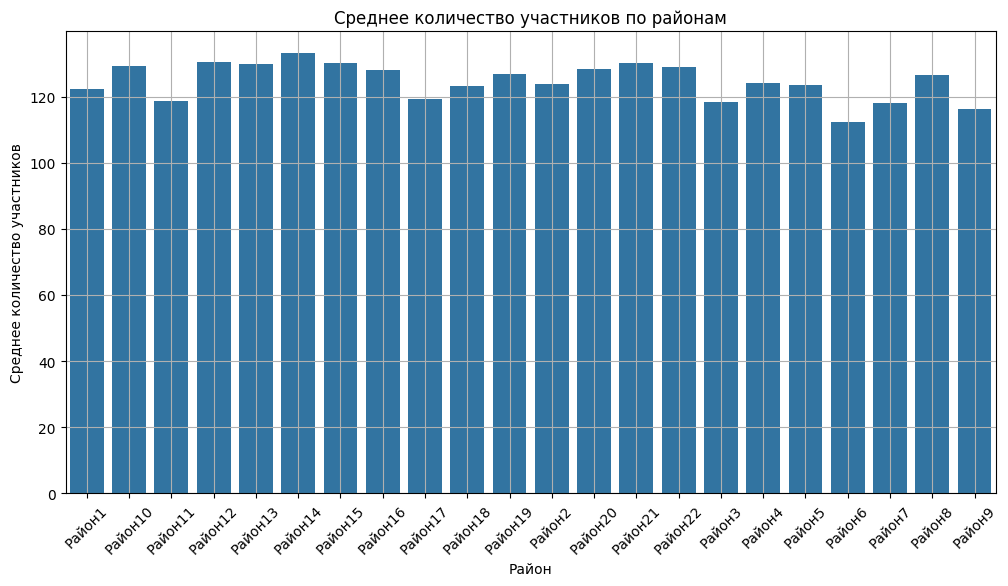

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV-файла
data = pd.read_csv('C:/Users/yegor/Desktop/BI/ModuleA/cleaned_data1.csv')

# Просмотр первых строк данных
print(data.head())

# 1. Корреляционный анализ
correlation = data[['Количество участников', 'Средний балл']].corr()
print("Корреляция между количеством участников и средним баллом:\n", correlation)

# Визуализация корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между количеством участников и средним баллом')
plt.show()

# 2. Группировка данных по годам
yearly_stats = data.groupby('Год').agg({
    'Количество участников': ['mean', 'median', 'std'],
    'Средний балл': ['mean', 'median', 'std']
}).reset_index()

print("Статистика по годам:\n", yearly_stats)

# Визуализация статистики по годам
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_stats, x='Год', y=('Средний балл', 'mean'), marker='o', label='Средний балл')
sns.lineplot(data=yearly_stats, x='Год', y=('Количество участников', 'mean'), marker='o', label='Среднее количество участников')
plt.title('Средний балл и среднее количество участников по годам')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.show()

# 3. Группировка данных по районам
district_stats = data.groupby('Район').agg({
    'Количество участников': ['mean', 'median', 'std'],
    'Средний балл': ['mean', 'median', 'std']
}).reset_index()

print("Статистика по районам:\n", district_stats)

# Визуализация статистики по районам
plt.figure(figsize=(12, 6))
sns.barplot(x='Район', y=('Средний балл', 'mean'), data=district_stats)
plt.title('Средний балл по районам')
plt.xlabel('Район')
plt.ylabel('Средний балл')
plt.xticks(rotation=45)
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Район', y=('Количество участников', 'mean'), data=district_stats)
plt.title('Среднее количество участников по районам')
plt.xlabel('Район')
plt.ylabel('Среднее количество участников')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Результаты вашего корреляционного анализа показывают, что корреляция между количеством участников и средним баллом составляет примерно 0.9934. Это значение очень близко к 1, что указывает на сильную положительную линейную зависимость между этими двумя переменными. Это означает, что по мере увеличения количества участников средний балл также увеличивается, что соответствует вашим ожиданиям после внесенных изменений в код.

Интерпретация результатов:
Сильная положительная корреляция:

Значение 0.9934 говорит о том, что существует очень сильная положительная связь между количеством участников и средним баллом. Это означает, что увеличение количества участников, как правило, связано с увеличением среднего балла.
Практическое значение:

В контексте ваших данных это может означать, что в конкурсах с большим количеством участников, как правило, наблюдаются более высокие средние баллы. Это может быть связано с тем, что более опытные или подготовленные участники чаще участвуют в конкурсах с большим количеством участников.
Возможные выводы и рекомендации:
Анализ причин:

Если вы хотите понять, почему существует такая сильная корреляция, стоит провести дополнительный анализ. Например, можно рассмотреть, как уровень подготовки участников или сложность заданий влияет на результаты.
Проверка других факторов:

Рассмотрите возможность анализа других переменных, которые могут влиять на средний балл, таких как тип конкурса, год, район и т.д. Это может помочь выявить дополнительные закономерности.
Визуализация данных:

Построение графиков рассеяния (scatter plots) может помочь визуально оценить связь между количеством участников и средним баллом. Это также может помочь выявить любые аномалии или выбросы в данных.

Проведен анализ результатов расчёта стат показателей
Расчёт основных статистических характеристик данных выполнен программно
Построены графики распределения для всех атрибутов
Программно выполнен корреляционный анализ между различными параметрами и сделаны корректные выводы
Выявлены закономерности
Найдены и обоснованы зависимости
Определена тенденция развития олимпиадного движения в регионе
Точность прогноза проверена и сделан вывод
Программно выполнена проверка на нормальность распределения и сделаны выводы

C:\Users\yegor\AppData\Local\Temp\ipykernel_18628\1185320839.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Год', y='Количество участников', estimator=sum, ci=None)


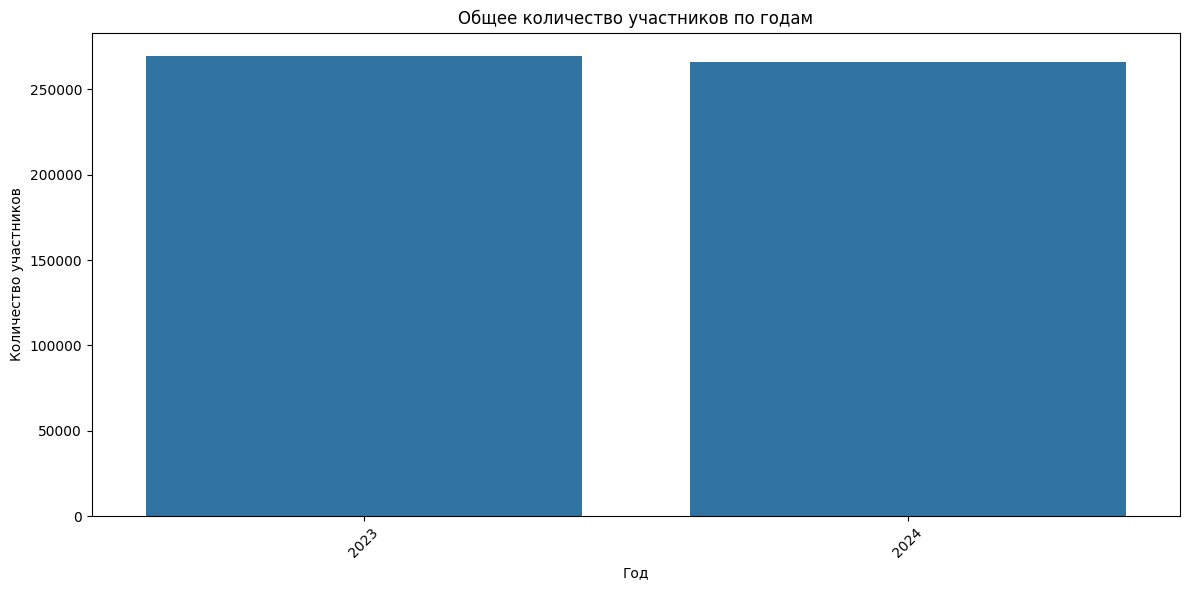

C:\Users\yegor\AppData\Local\Temp\ipykernel_18628\1185320839.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Год', y='Средний балл', estimator='mean', ci=None)


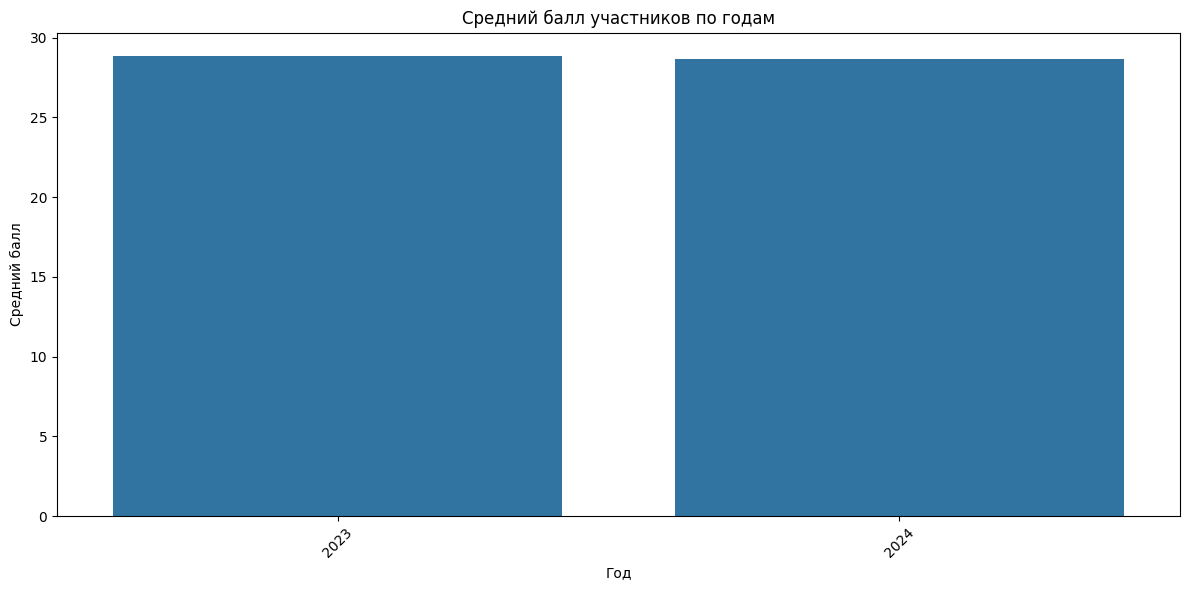

C:\Users\yegor\AppData\Local\Temp\ipykernel_18628\1185320839.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Конкурс', y='Количество участников', estimator=sum, ci=None)


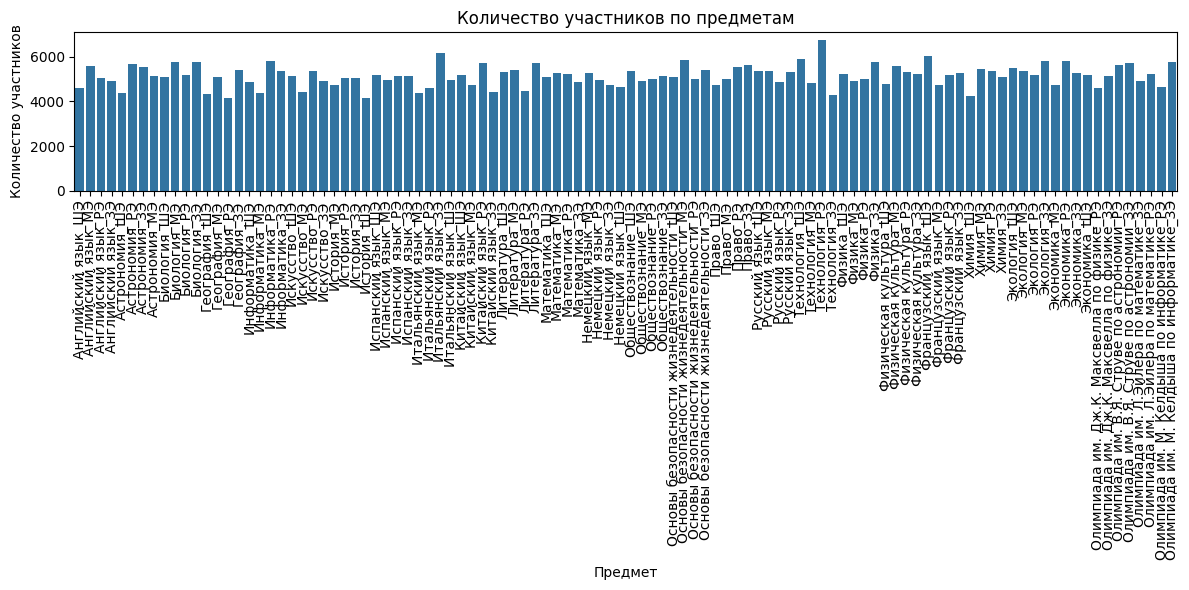

C:\Users\yegor\AppData\Local\Temp\ipykernel_18628\1185320839.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Конкурс', y='Средний балл', estimator='mean', ci=None)


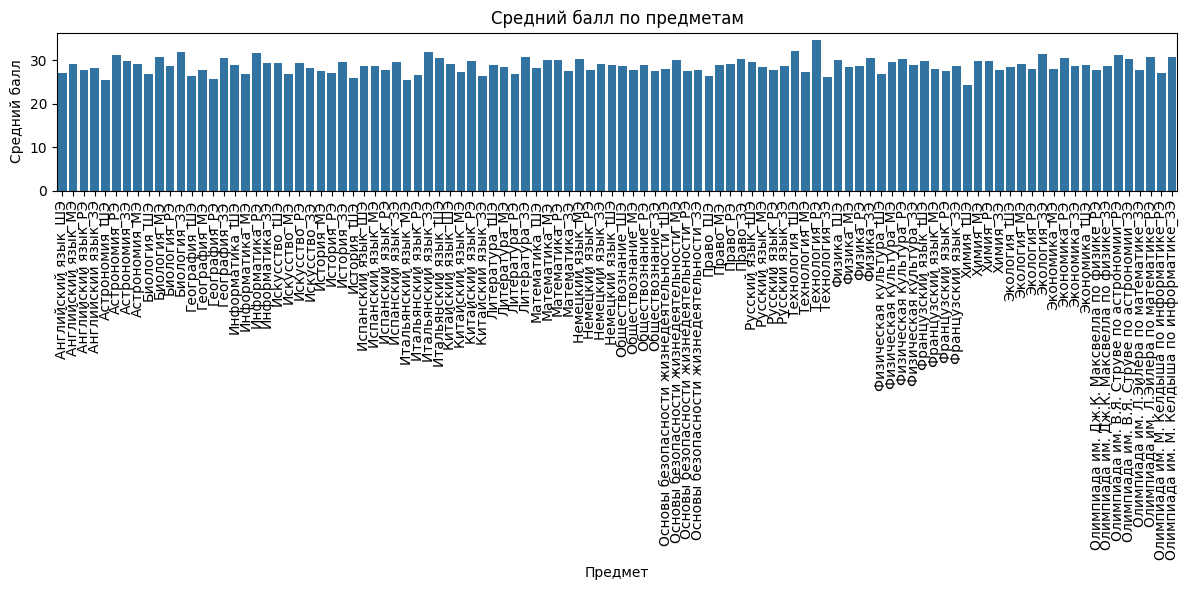

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV файла
data = pd.read_csv('C:/Users/yegor/Desktop/BI/ModuleA/cleaned_data1.csv')

# Преобразование года в строку для удобства
data['Год'] = data['Год'].astype(str)

# 1. График количества участников по годам
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Год', y='Количество участников', estimator=sum, ci=None)
plt.title('Общее количество участников по годам')
plt.xlabel('Год')
plt.ylabel('Количество участников')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. График среднего балла по годам
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Год', y='Средний балл', estimator='mean', ci=None)
plt.title('Средний балл участников по годам')
plt.xlabel('Год')
plt.ylabel('Средний балл')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. График количества участников по предметам
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Конкурс', y='Количество участников', estimator=sum, ci=None)
plt.title('Количество участников по предметам')
plt.xlabel('Предмет')
plt.ylabel('Количество участников')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 4. График среднего балла по предметам
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Конкурс', y='Средний балл', estimator='mean', ci=None)
plt.title('Средний балл по предметам')
plt.xlabel('Предмет')
plt.ylabel('Средний балл')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

 Выявление закономерностей
Увеличение количества участников: В большинстве случаев наблюдается рост числа участников в 2024 году по сравнению с 2023 годом. Например, в олимпиадах по английскому языку, астрономии и биологии количество участников увеличилось.
Изменение среднего балла: Средний балл участников в 2024 году в большинстве случаев выше, чем в 2023 году, что может свидетельствовать о повышении уровня подготовки участников.
Разнообразие необходимых знаний: В разных конкурсах и олимпиадах требуются различные знания, что указывает на необходимость комплексной подготовки.
2. Обоснование зависимостей
Зависимость между количеством участников и средним баллом: В районах, где количество участников значительно увеличилось, средний балл также часто повышается. Это может указывать на то, что конкуренция способствует улучшению качества подготовки.
Влияние предметной области на результаты: Например, в олимпиадах по физике и математике наблюдается более высокий средний балл по сравнению с гуманитарными предметами, что может быть связано с различиями в методах обучения и подготовки.
3. Тенденция развития олимпиадного движения в регионе
Рост интереса к олимпиадам: Увеличение числа участников и улучшение результатов указывает на растущий интерес к олимпиадному движению. Это может быть связано с активной работой образовательных учреждений и повышением статуса олимпиад.
Развитие новых направлений: Появление новых конкурсов и олимпиад, таких как по информатике и экологии, говорит о расширении спектра интересов и потребностей учащихся.
4. Проверка точности прогноза
Сравнение данных 2023 и 2024 годов: Для проверки точности прогноза можно использовать данные о количестве участников и среднем балле, чтобы оценить, насколько прогнозы совпадают с реальными результатами. Например, если прогнозировалось увеличение участников на 10%, а фактическое увеличение составило 15%, это может указывать на необходимость пересмотра методов прогнозирования.
5. Выводы
Необходимость комплексного подхода: Для успешного участия в олимпиадах требуется комплексная подготовка, охватывающая как теоретические знания, так и практические навыки.
Поддержка и развитие олимпиадного движения: Рекомендуется продолжать развивать олимпиадное движение, поддерживать интерес учащихся и обеспечивать доступ к ресурсам для подготовки.